In [2]:
import numpy as np
import math as m
import os
import cv2 as cv
from sklearn.cluster import KMeans

## This code was written for data analysis of an experiment on nucleation and growth of Te thin films, as part of the course
# Experimental Materials Science and Design at UC Berkeley. The objective is to process a sequence of frames and compute the 
# total area of the film that has been crystallized. 

# This code takes the previously determined k_means centroids as average values for each Te phase (crystalline and amorphous)
# and performs a proximity calculation to determine whether a point has been transformed. Finally, it calculates the area 
# fraction of transformed material. 

os.chdir('C:/Users/leoch_000/Desktop/MSE 130 Labs/30C 9nm Frames/') # Moves to the directory of the target temperature
print(os.getcwd())

C:\Users\leoch_000\Desktop\MSE 130 Labs\30C 9nm Frames


In [3]:
root_dir = 'C:/Users/leoch_000/Desktop/MSE 130 Labs/30C 9nm Frames/' # Chooses the target directory (associated with an 
#experimental temperature)

area_fraction_Vec = np.array([0]) # Initializes the area fraction of crystal as 0

# Iterates through every file in the directory
for directory, subdirectories, files in os.walk(root_dir):
    for file in files:
        im = cv.imread(os.path.join(directory, file)) # Reads the frame as a numpy array.
        
        # Performs data selection (left half of image is kept)
        cut = m.floor((np.size(im, 1)/2)) 
        im = im[:, 0:cut, :]
        orig_x = np.size(im, 0)
        orig_y = np.size(im, 1)
        print(np.size(im, 0), np.size(im, 1))
        # Transforms the 3-d array into a 2-d array
        im = np.reshape(im, (np.size(im, 0)*np.size(im, 1), 3))
        
        # Vectorizes specified centroids (see MSE130KMeans)
        amorphous_centroid = np.array([18.11586087 , 43.30814824 , 89.14971191]) # RGB coordinates of crystal centroid
        crystal_centroid = np.array([18.82141992 , 50.36834409, 106.42255402]) # RGB coordinates of amorphous centroid
        c = np.zeros((orig_x* orig_y, 3))
        a = np.zeros((orig_x* orig_y, 3))
        c = c+crystal_centroid
        a = a+amorphous_centroid
        # Calculates row vector of squared distances to crystal centroid
        dc = c-im 
        dc_dis = np.sum(np.abs(dc)**2, axis=-1)
        # Calculates row vector of squared distances to amorphous centroid
        da = a-im 
        da_dis = np.sum(np.abs(da)**2, axis=-1)
        
        
        # Initialize count
        crystals = 0
        amorphous = 0
        
        i = 0 # Initializes counter
        while i < np.size(im, 0):
            if dc_dis[i] < da_dis[i]:
                crystals = crystals + 1
            else:
                amorphous = amorphous + 1
            i+=1
            
        cr_area_fraction = np.array([crystals/(crystals+amorphous)])
        
        area_fraction_Vec = np.concatenate([area_fraction_Vec, cr_area_fraction]) # Adds to the time dependent array
        
print(area_fraction_Vec)
            
        

1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
1536 1024
[0.00000000e+00 2.92460124e-05 2.98817952e-05 3.80330404e-01
 4.68025208e-01 5.58376312e-0

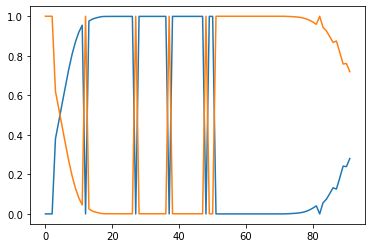

In [4]:
import matplotlib.pyplot as plt
from numpy import savetxt
r = np.size(area_fraction_Vec)
x = np.array(range(r))
plt.plot(x, area_fraction_Vec, x, 1-area_fraction_Vec)
##savetxt('a30p.csv', area_fraction_Vec, delimiter=',')
##savetxt('a30n.csv', 1-area_fraction_Vec, delimiter=',')

4
